In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_olivetti_faces

In [2]:
df = pd.DataFrame(data=fetch_olivetti_faces().data)
df["classe"] = fetch_olivetti_faces().target
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,classe
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [3]:
x = df[df.columns[:-1:]].to_numpy()
y = df[df.columns[-1]].to_numpy() #classe

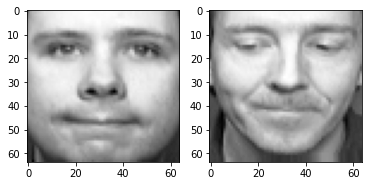

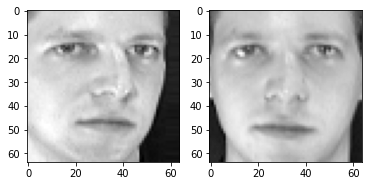

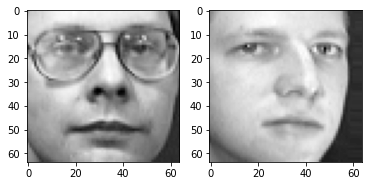

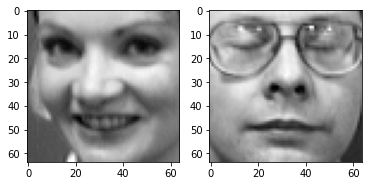

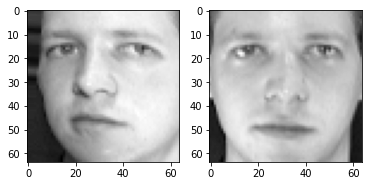

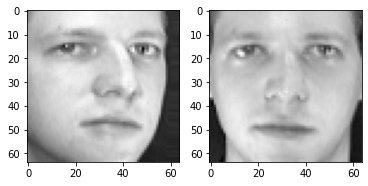

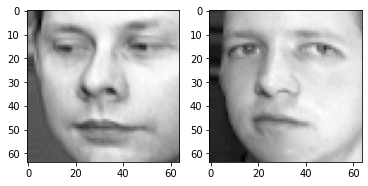

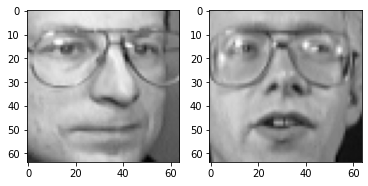

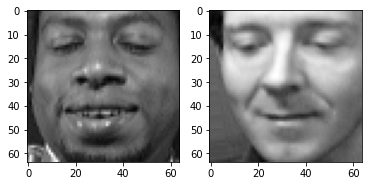

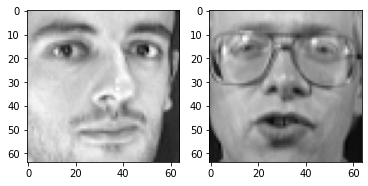

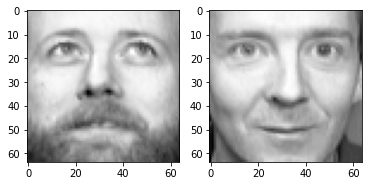

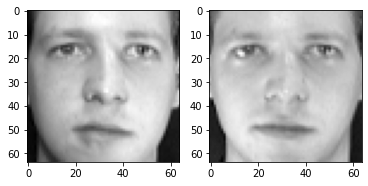

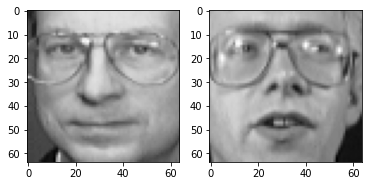

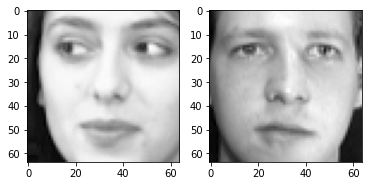

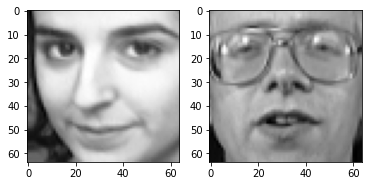

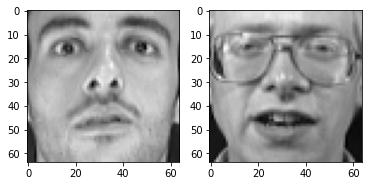

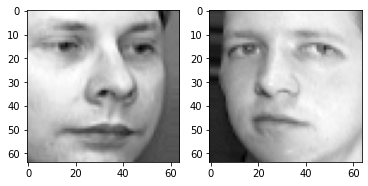

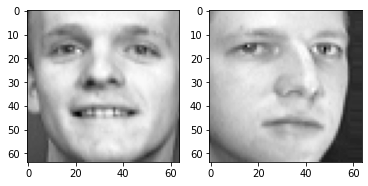

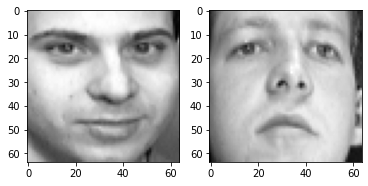

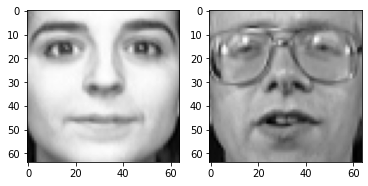

In [4]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, y)
for train_index, test_index in skf.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    treinoX, testeX = x[train_index], x[test_index]
    treinoY, testeY = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors=1, weights= "distance",metric="euclidean")
    knn.fit(treinoX,treinoY)
    y_pred = knn.predict(testeX)
    y_true = testeY



    #imprime na tela imagem com erro de clasificação 
    for i in range(len(y_true)):
        if(y_pred[i] != y_true[i]): #errou
            plt.subplot(1,2,1)
            plt.imshow(testeX[i].reshape(64,64), cmap= plt.cm.gray)
            plt.subplot(1,2,2)
            plt.imshow(treinoX[i].reshape(64,64), cmap= plt.cm.gray)
            plt.show()
    